My name is Harish Kumber. I have done this project on my own. I have not cheated from others including my friends, professor, Tas etc. If it is found that I have done cheating or used any malpractice, I come under action according to institute rules. 

In [115]:
#Importing the required library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm 

In [116]:
data=pd.read_csv('restaurent.csv') #Loading the required csv file

In [164]:
# eleminating the values which have blanks and nan values
for i in range(data.shape[1]):
    data= data.iloc[data.iloc[:, i].notna().to_numpy()]

# Selecting random 50 rows out of the total given rows
np.random.seed(1289)
indices = np.arange(data.shape[0]) #creating a new variable indices to select random variables
np.random.shuffle(indices) 
train_data=data.iloc[indices[:int(0.92*len(indices))]]
test_data=data.iloc[indices[int(0.92*len(indices)):]]


#Seeing the splitted and random data 
print(train_data)
print(test_data)

#Seeing some mean,minimum of randomly selected data
train_data.describe()

     food  decor  service  price
61   20.0   12.0     17.0   22.0
43   20.0   23.0     16.0   44.0
103  24.0   14.0     21.0   53.0
110  18.0   14.0     16.0   30.0
70   20.0   18.0     20.0   48.0
..    ...    ...      ...    ...
104  22.0   19.0     18.0   44.0
39   21.0   22.0     20.0   41.0
101  21.0   21.0     19.0   33.0
71   21.0   21.0     19.0   33.0
47   18.0   14.0     16.0   20.0

[104 rows x 4 columns]
     food  decor  service  price
111  17.0   17.0     18.0   34.0
91   19.0   16.0     18.0   25.0
7    21.0   12.0     19.0   29.0
98   20.0   21.0     19.0   33.0
83   18.0   15.0     16.0   21.0
49   14.0   21.0     17.0   36.0
90   18.0   17.0     18.0   34.0
109  20.0   21.0     18.0   40.0
81   21.0    2.0     16.0   22.0
44   26.0   27.0     26.0   65.0


,food,decor,service,price
count,104.000000,104.000000,104.000000,104.000000
mean,19.625000,16.548077,17.701923,33.259615
std,2.489541,4.235495,2.851945,11.033044
min,14.000000,6.000000,10.000000,11.000000
25%,18.000000,14.000000,16.000000,25.000000
50%,20.000000,16.000000,18.000000,32.000000
75%,21.000000,19.250000,20.000000,41.000000
max,27.000000,28.000000,26.000000,64.000000


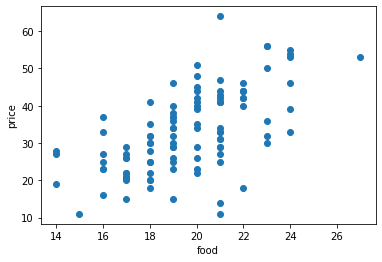

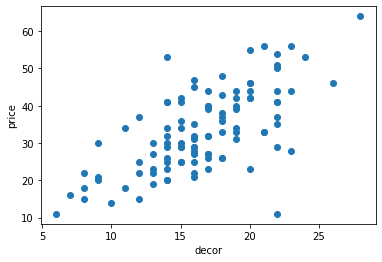

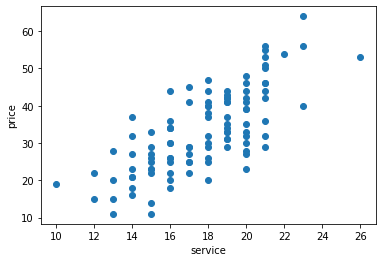

<Figure size 432x288 with 0 Axes>

In [165]:
#Q1 
#Taking variable for axis
y_axis=train_data['price'] # Storing prices of food in y_axis variables
x1_axis=train_data['food'] 
x2_axis=train_data['decor']
x3_axis=train_data['service']

#Plotting price vs food
plt.scatter(x1_axis,y_axis)
plt.xlabel('food')
plt.ylabel('price')
plt.show()
plt.clf()

#Plotting price vs decore
plt.scatter(x2_axis,y_axis)
plt.xlabel('decor')
plt.ylabel('price')
plt.show()
plt.clf()

#Plotting price vs service
plt.scatter(x3_axis,y_axis)
plt.xlabel('service')
plt.ylabel('price')
plt.show()
plt.clf()

In [166]:
train_data.head()

,food,decor,service,price
61,20.0,12.0,17.0,22.0
43,20.0,23.0,16.0,44.0
103,24.0,14.0,21.0,53.0
110,18.0,14.0,16.0,30.0
70,20.0,18.0,20.0,48.0


In [167]:
train_data.describe()

,food,decor,service,price
count,104.000000,104.000000,104.000000,104.000000
mean,19.625000,16.548077,17.701923,33.259615
std,2.489541,4.235495,2.851945,11.033044
min,14.000000,6.000000,10.000000,11.000000
25%,18.000000,14.000000,16.000000,25.000000
50%,20.000000,16.000000,18.000000,32.000000
75%,21.000000,19.250000,20.000000,41.000000
max,27.000000,28.000000,26.000000,64.000000


In [168]:
#function for pre-processing the data
def pre_process(data, train=True):
 
    for i in range(data.shape[1]):
        data = data.iloc[data.iloc[:, i].notna().to_numpy()] #remove the NaN values from data
        
# If data is for training that data will process from here
    if train:
        mu = data.iloc[:, :-1].mean(0)  # calculate mean
        sigma = data.iloc[:, :-1].std(0)    # calculate std
        
        #Assigning X_train variables for storing decor, servivce and food 
        #y_train for price
        X_train, y_train = data.iloc[:, :-1], data.iloc[: ,-1]
        
        # normalize the training set
        X_train -= mu
        X_train /= sigma   
    
        
        print(f'\nTraining Size: {X_train.shape[0]}')
        print(f'Number of features: {X_train.shape[1]}')

        return X_train, y_train.to_numpy()

    else:
        mu = data.mean(0)   # calculate mean
        sigma = data.std(0) # calculate std
        X_test = data
        X_test -= mu
        X_test /= sigma # normalize the test set
      
        
        print(f'Testing Size: {X_test.shape[0]}')
        return X_test

In [169]:
X_train, y_train= pre_process(train_data)    # pre-process the training data
y_test=test_data.iloc[:,-1].to_numpy()
X_test=test_data.iloc[:,:-1]
X_test = pre_process(X_test, train=False) 
print(type(y_test))


Training Size: 104
Number of features: 3
Testing Size: 10
<class 'numpy.ndarray'>


In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 61 to 47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   food     104 non-null    float64
 1   decor    104 non-null    float64
 2   service  104 non-null    float64
dtypes: float64(3)
memory usage: 3.2 KB


In [171]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 111 to 44
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   food     10 non-null     float64
 1   decor    10 non-null     float64
 2   service  10 non-null     float64
dtypes: float64(3)
memory usage: 320.0 bytes


In [172]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)  # instantiate the sklearn linear regression model
y_pre=reg.predict(X_test)
print(type(y_pre))

<class 'numpy.ndarray'>


In [173]:
y=pd.DataFrame({'pred':y_pre,'test':y_test})
y

,pred,test
0,30.058374,34.0
1,31.666478,25.0
2,32.084770,29.0
3,37.382485,33.0
4,27.858137,21.0
5,28.477102,36.0
6,31.221353,34.0
7,36.418732,40.0
8,22.014961,22.0
9,55.413763,65.0


In [174]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y_pre contains the predicted regression values
mae = mean_absolute_error(y_test, y_pre)
mse = mean_squared_error(y_test, y_pre)
rmse = mean_squared_error(y_test, y_pre, squared=False)
r2 = r2_score(y_test, y_pre)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 4.84175058392458
Mean Squared Error: 30.477087749389597
Root Mean Squared Error: 5.520605741165511
R-squared: 0.7855085667577619


In [163]:
#Q2 
y_predicted=reg.predict(X_test)[0]  # predictions for test data
print('Predicted price of meal: %s' %y_predicted)
sum_errs = sum((y_train-reg.predict(X_train) )**2) #sum of errors for calculating interval
stdev = np.sqrt(1/(len(y_train)-2) * sum_errs) #Calculating standard deviation 
interval = 1.96 * stdev  #Calculating 95% predictive interval
print('95 predicted interval: %s' %interval)

Predicted price of meal: 31.128939809950648
95 predicted interval: 12.353511661116032


In [283]:
#Q3
#if we hold the value of service and decor constant and increase food by 1, then price goes up by value of coefficient of food
# calculating coefficient of variable food
variable_food=reg.predict(X_test)[1]-reg.predict(X_test)[0]
print('coeffiecient for variable food: %s'%variable_food)
print('Note=I have preprocessed data so depending on it w values may vary')

coeffiecient for variable food: 0.02402235673118014
Note=I have preprocessed data so depending on it w values may vary


coefficient for food variable: 0.10887611672644226


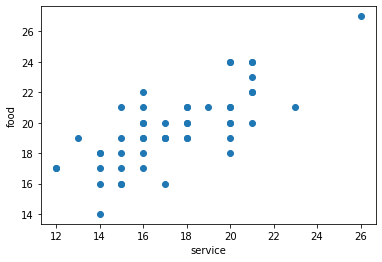

In [278]:
#Q4
#plotting food vs service 
plt.xlabel('service')
plt.ylabel('food')
plt.scatter(x3_axis,x1_axis)

# Doing linear regression assuming that price only depends on food quality 
new_X_train=pd.DataFrame({'food':X_train['food']}) # creating variables which contains food values only
new_test=pd.DataFrame({'food':X_test['food']}) 
new_reg = LinearRegression().fit(new_X_train,y_train)

#Calculating coefficent for food variable
new_coefficient=new_reg.predict(new_test)[1]-new_reg.predict(new_test)[0]
print('coefficient for food variable: %s' %(new_coefficient))